Veri yükleniyor...
Grafik kaydedildi: grafik1_dagilim.png

Veri Temizlendi!
Yeni Boyut: (145460, 23)
Eksik Veri Sayısı: 0


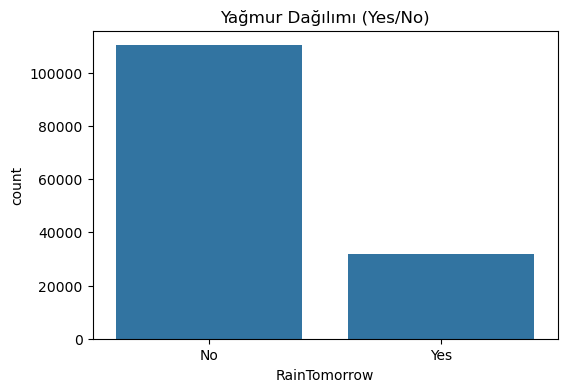

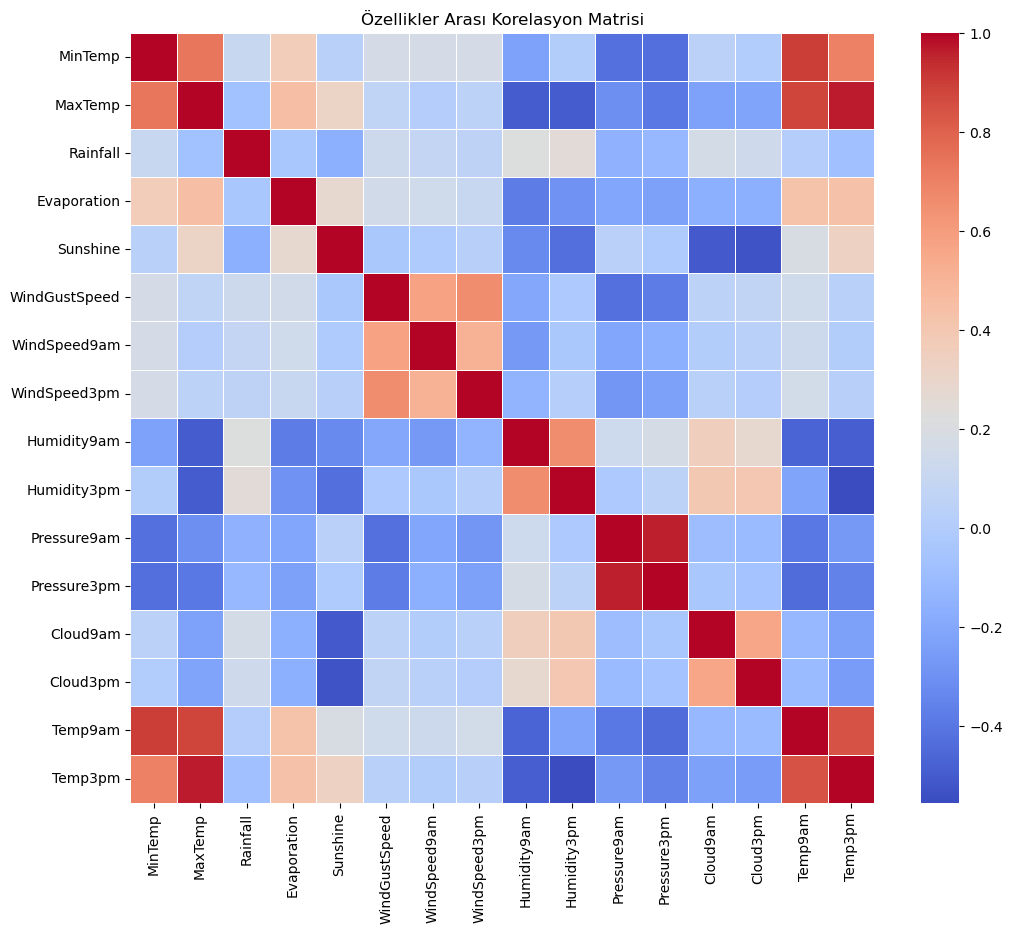

<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

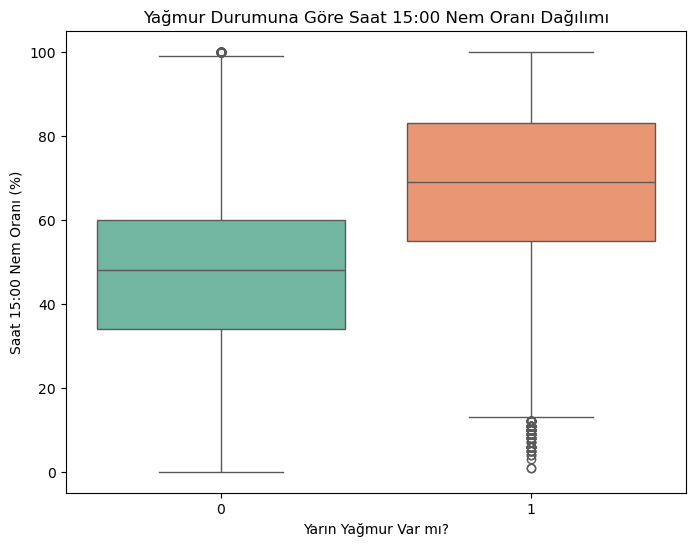

<Figure size 640x480 with 0 Axes>

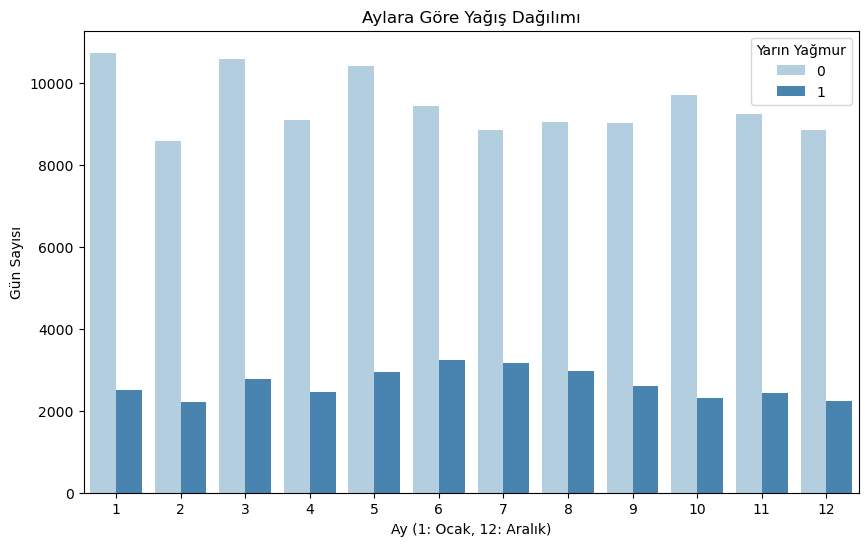

Dosya kaydedildi: cleaned_weather_vize.csv


<Figure size 640x480 with 0 Axes>

In [1]:
# --- MASTER TEMİZLİK KODU ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Gerekli Kütüphaneler
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Veriyi Yükle
print("Veri yükleniyor...")
df = pd.read_csv('weatherAUS.csv')

# 2. İLK GRAFİK: Hedef Değişken Dağılımı
plt.figure(figsize=(6,4))
sns.countplot(x='RainTomorrow', data=df)
plt.title("Yağmur Dağılımı (Yes/No)")
plt.savefig('grafik1_dagilim.png')
print("Grafik kaydedildi: grafik1_dagilim.png")

# 3. Data Leakage Önlemi
if 'RISK_MM' in df.columns:
    df.drop('RISK_MM', axis=1, inplace=True)
    print("RISK_MM sütunu başarıyla silindi.")

# 4. Tarih Parçalama
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df.drop('Date', axis=1, inplace=True)

# 5. Eksik verileri doldurmak
# Sayısallar -> Medyan
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# Kategorikler -> Mod
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# 6. Kategorik verileri sayıya çevirmek
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("\nVeri Temizlendi!")
print(f"Yeni Boyut: {df.shape}")
print(f"Eksik Veri Sayısı: {df.isnull().sum().sum()}")
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Korelasyon matrisini hesaplamak
corr_matrix = numerical_df.corr()

# Grafik çizmek
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Özellikler Arası Korelasyon Matrisi')
plt.show()
plt.savefig('grafik2_heatmap.png')

plt.figure(figsize=(8, 6))

plt.figure(figsize=(8, 6))

sns.boxplot(x='RainTomorrow', y='Humidity3pm', 
            data=df, 
            hue='RainTomorrow',  
            palette='Set2', 
            legend=False)        

plt.title('Yağmur Durumuna Göre Saat 15:00 Nem Oranı Dağılımı')
plt.xlabel('Yarın Yağmur Var mı?')
plt.ylabel('Saat 15:00 Nem Oranı (%)')
plt.show() 
plt.savefig('grafik3_boxplot.png')

plt.figure(figsize=(10, 6))

sns.countplot(x='Month', hue='RainTomorrow', data=df, palette='Blues')
plt.title('Aylara Göre Yağış Dağılımı')
plt.xlabel('Ay (1: Ocak, 12: Aralık)')
plt.ylabel('Gün Sayısı')
plt.legend(title='Yarın Yağmur', loc='upper right')
plt.show()
plt.savefig('grafik4_mevsimsellik.png')


# 7. Temiz Dosyayı Kaydet
df.to_csv('cleaned_weather_vize.csv', index=False)
print("Dosya kaydedildi: cleaned_weather_vize.csv")